# Students exam performance analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Loading the data

In [2]:
data=pd.read_csv('E:\SEM 5\LAB\ML LAB\CAT 2\doc\StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Exploratory Analysis

In [6]:
print('Math mean: ',data['math score'].mean(),
      'Reading mean: ',data['reading score'].mean(),'Writing mean:',data['writing score'].mean())
print('Number of female students in the sample: ',len(data.loc[data['gender']=='female']))

Math mean:  66.089 Reading mean:  69.169 Writing mean: 68.054
Number of female students in the sample:  518


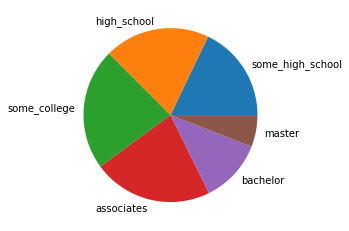

In [7]:
high_school=data.loc[data['parental level of education']=='high school']
associates=data.loc[data['parental level of education']=="associate's degree"]
bachelor=data.loc[data['parental level of education']=="bachelor's degree"]
some_college=data.loc[data['parental level of education']=='some college']
some_high_school=data.loc[data['parental level of education']=='some high school']
master=data.loc[data['parental level of education']=="master's degree"]
parental_education=['some_high_school','high_school','some_college','associates','bachelor','master']
edu_list=[len(some_high_school),len(high_school),len(some_college),len(associates),len(bachelor),len(master)]
plt.pie(edu_list,labels=parental_education)
plt.show()

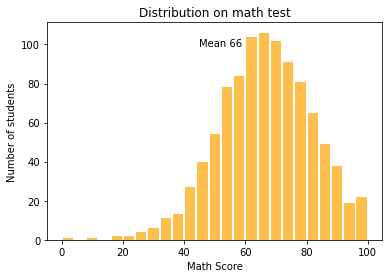

In [8]:
plt.hist(x=data['math score'], bins='auto', color='orange',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Math Score')
plt.ylabel('Number of students')
plt.title('Distribution on math test')
plt.text(45,99,'Mean 66')
plt.show()

# Data Selection

In [9]:
parental_edu_score_rubric={'some high school':0,
                           'high school':1,
                           'some college':2,
                           "associate's degree":3,
                           "bachelor's degree":4,
                           "master's degree":5}
lunch_rubric={'standard':1,'free/reduced':0}
course_rubric={'none':0,'completed':1}
gender_rubric={'female':0,'male':1}

In [10]:
lst=[]
for i in range(len(data)):
    lst.append(data['math score'][i]+data['writing score'][i]+data['reading score'][i])
    
total_score=pd.Series(lst)

In [11]:
features=['parental_edu','lunch','test_prep','gender']
df=pd.DataFrame(columns=features)
for i in range(len(data)):
    p=data['parental level of education'][i]
    l=data['lunch'][i]
    t=data['test preparation course'][i]
    g=data['gender'][i]
    df_temp=pd.DataFrame([[parental_edu_score_rubric[p],lunch_rubric[l],course_rubric[t],gender_rubric[g]]],
                         columns=features)
    df=df.append(df_temp,ignore_index=True,)
df.head()

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local\Temp\ipykernel_3036\2578744106.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp,ignore_index=True,)
C:\Users\susan\AppData\Local

,parental_edu,lunch,test_prep,gender
0,4,1,0,0
1,2,1,1,0
2,5,1,0,0
3,3,0,0,1
4,2,1,0,1


# Linear Regression Models

### 1. Regression of total scores on a list of features including gender, parental level of education, test preparation course, and lunch

The low R^2 value (only 0.21) indicates that the correlation is not significant.

In [13]:
model=linear_model.LinearRegression()
regr=model.fit(df,total_score)
print('coef: ',regr.coef_[0],regr.coef_[1],regr.coef_[2],regr.coef_[3])
print('R^2: ',regr.score(df,total_score))

coef:  6.12146159333611 26.998647429712427 23.553712579562983 -11.099243727699296
R^2:  0.2154490486266485


### 2. Regression of subject scores on one another

In [14]:
math=np.array(data['math score']).reshape(-1,1)
reading=np.array(data['reading score']).reshape(-1,1)
writing=np.array(data['writing score']).reshape(-1,1)

As evident in the scatterplot, there exist a positive linear correlation between math and reading scores, math and writing scores, and especially between reading and writing scores.

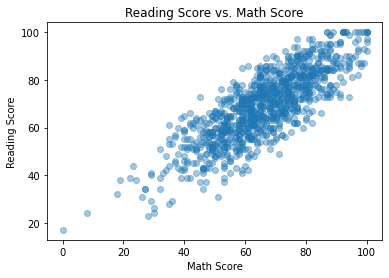

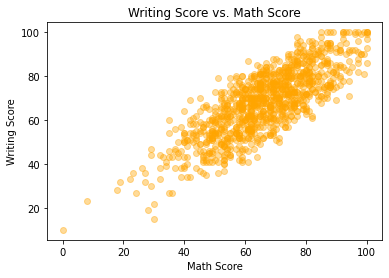

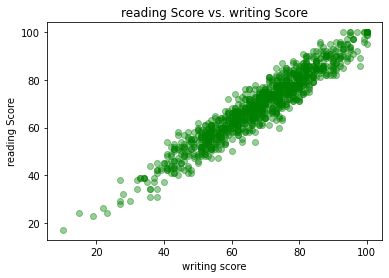

In [16]:
plt.scatter(data['math score'],data['reading score'],alpha=0.4)
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Reading Score vs. Math Score')
plt.show()

plt.scatter(data['math score'],data['writing score'],alpha=0.4,color='orange')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Writing Score vs. Math Score')
plt.show()

plt.scatter(data['writing score'],data['reading score'],alpha=0.4,color='green')
plt.xlabel('writing score')
plt.ylabel('reading Score')
plt.title('reading Score vs. writing Score')
plt.show()

As the regression below manifests, there exist some level of correlation between math score and reading score;  
There exist an extremely strong correlation between reading and writing score, which also makes sense intuitively.

In [17]:
math_reading=linear_model.LinearRegression()
mr=math_reading.fit(math,reading)
print(mr.score(math,reading))

0.6684365064501091


In [18]:
math_writing=linear_model.LinearRegression()
mwr=math_writing.fit(math,writing)
print(mwr.score(math,writing))

0.6442342539264934


In [19]:
reading_writing=linear_model.LinearRegression()
rw=reading_writing.fit(reading,writing)
print(rw.score(reading,writing))

0.9112574888913137
